# Data Pre-Processing

## Read in data

### Declare global variables

In [2444]:
#Static variables
#Got rid of json file as does not contain data i needed
FOLDER = "..\RawDatasets"
FOLDER_PRO = "..\ProcessedDatasets"
fn1 = "\QIEN628BIS(1).csv"
fn2 = "\PPR-ALL.csv"
fn3 = "\pro_dataset.csv"
fn4 = "\FY001.20231025T171056.csv"
fn5 = "\pro_census.csv"
fn6 = "\_66ed6ea5-a98c-4fd5-8185-7d21ca7f3bce.csv"
fn7 = "\HSQ06.20231110164211.csv"
fp1 = FOLDER + fn1
fp2 = FOLDER + fn2
fp3 = FOLDER_PRO + fn3
fp4 = FOLDER + fn7

### Imports -> List of imports: pandas, numpy ,os, matplotlib

In [2445]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from matplotlib.ticker import (FormatStrFormatter) 
import os
os.getcwd()

'c:\\Users\\SKy\\GitRepos\\Project1-HousePricePrediction\\DataPreprocessing'

### Read in Data from file "PPR-ALL.csv" into Pandas DataFrame encoding="ANSI"

In [2446]:
df = pd.read_csv(fp2, encoding='ANSI',engine='python',dtype={'Address': str})


### Exploring the data

In [2447]:
#Head of the data first 5 rows
df.head()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"€343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"€438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"€400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"€160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [2448]:
#Tail of the data last 5 rows
df.tail()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
624072,06/10/2023,"ROSE COTTAGE, KNOCKAUNARAST, BALLYSAGGART",Waterford,P51A091,"€325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624073,06/10/2023,"SAUNDERS COURT, MULLINGAR, WESTMEATH",Westmeath,NaN,"€250,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624074,06/10/2023,"THE GREEN, FETHARD, CO TIPPERARY",Tipperary,NaN,"€66,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
624075,06/10/2023,"THREE CASTLES, MANOR KILBRIDE, BLESSINGTON",Wicklow,W91E2V8,"€370,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624076,06/10/2023,"TUREEN, WALSH ISLAND, TULLAMORE",Offaly,R35YX39,"€325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [2449]:
#Basic Info on Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624077 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  624077 non-null  object
 1   Address                    624077 non-null  object
 2   County                     624077 non-null  object
 3   Eircode                    112792 non-null  object
 4   Price (€)                  624077 non-null  object
 5   Not Full Market Price      624077 non-null  object
 6   VAT Exclusive              624077 non-null  object
 7   Description of Property    624077 non-null  object
 8   Property Size Description  52819 non-null   object
dtypes: object(9)
memory usage: 42.9+ MB


In [2450]:
#Gives count of, unique values, top, and freq
df.describe()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
count,624077,624077,624077,112792,624077,624077,624077,624077,52819
unique,4756,564932,26,110330,36217,2,2,5,6
top,22/12/2014,"Broomfield, Midleton",Dublin,A96WV79,"€150,000.00",No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
freq,1542,21,196273,8,7712,593703,522782,520788,38089


### Read in Data from json file -> Data not useful removed..."

In [2451]:
##df2 = pd.read_json(fp1)

### Explore data

In [2452]:
##df2.head()

In [2453]:
##df2.tail()

In [2454]:
##df2.info()

In [2455]:
##df2.describe()

In [2456]:
#Explore the structure of the Valuation Report
##df2.loc[0,"ValuationReport"]

In [2457]:
#Explore the structure of the Valuation Report
##df2.loc[4,"ValuationReport"]

In [2458]:
#Explore breakdown of Residential/Commerical
#There are no residential listing in dataset despite it having that as a Category
##df2["Category"].unique()

### Drop blank rows

In [2459]:
#Check for null rows - Result : 0
null_rows = df[df.isnull().all(axis=1)]
null_rows.count()
#Drop any null rows
df = df.drop(null_rows.index)

In [2460]:
#Get count of number rows have 'Not Full Market Price' set to "Yes"
yes_count = (df['Not Full Market Price'] == "Yes").sum()
yes_count

30374

### Filter out properties marked as Not Full Market Price

In [2461]:
#Get new filtered list with only the Yes values
filtered_df = df[df['Not Full Market Price'] != "No"]

In [2462]:
filtered_df['Not Full Market Price'].unique()

array(['Yes'], dtype=object)

In [2463]:
#Get index of rows to delete
rows_to_delete = filtered_df.index
rows_to_delete

Index([    41,     48,     69,     89,    101,    116,    123,    129,    144,
          153,
       ...
       623898, 623908, 623966, 623969, 623975, 623976, 624002, 624028, 624034,
       624074],
      dtype='int64', length=30374)

In [2464]:
#Use drop method to actually delete
df = df.drop(rows_to_delete)

In [2465]:
df['Not Full Market Price'].unique()

array(['No'], dtype=object)

In [2466]:
#Check number of properties marked as VAT Exclusive
df[df['VAT Exclusive']=='Yes'].count()

Date of Sale (dd/mm/yyyy)    96506
Address                      96506
County                       96506
Eircode                       2185
Price (€)                    96506
Not Full Market Price        96506
VAT Exclusive                96506
Description of Property      96506
Property Size Description    50308
dtype: int64

In [2467]:
#Display rows that have VAT Exclusive == 'Yes'
vat_exclusive = df[df['VAT Exclusive']=='Yes']
vat_exclusive

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
14,04/01/2010,"25 Lavallin Drive, Whitechurch, Cork",Cork,NaN,"€352,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
20,04/01/2010,"48 KILLIANS COURT, MULLAGH",Cavan,NaN,"€122,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
21,04/01/2010,"49 ballynakelly green, newcastle",Dublin,NaN,"€499,600.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
28,04/01/2010,"Aughmagree, Kilteevan",Roscommon,NaN,"€215,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
...,...,...,...,...,...,...,...,...,...
624038,06/10/2023,"25 River Meadows, Cloughduv",Cork,NaN,"€299,559.00",No,Yes,New Dwelling house /Apartment,NaN
624047,06/10/2023,"37 Meadows Way, Crossneed, Co Laois",Laois,NaN,"€273,127.75",No,Yes,New Dwelling house /Apartment,NaN
624050,06/10/2023,"4 The Close, Vartry Wood, Ashford",Wicklow,NaN,"€466,960.00",No,Yes,New Dwelling house /Apartment,NaN
624055,06/10/2023,"58 Vatry Close, Tinakilly Park, Rathnew",Wicklow,NaN,"€442,477.00",No,Yes,New Dwelling house /Apartment,NaN


In [2468]:
#Change data type to correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  593703 non-null  object
 1   Address                    593703 non-null  object
 2   County                     593703 non-null  object
 3   Eircode                    107741 non-null  object
 4   Price (€)                  593703 non-null  object
 5   Not Full Market Price      593703 non-null  object
 6   VAT Exclusive              593703 non-null  object
 7   Description of Property    593703 non-null  object
 8   Property Size Description  51345 non-null   object
dtypes: object(9)
memory usage: 45.3+ MB


### Change date to format dd/mm/yyyy

In [2469]:
#Change Date of Sale
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], format='%d/%m/%Y').dt.strftime('%Y/%m/%d')

In [2470]:
#errors='coerce' handles any errors in parsing
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], format='%Y/%m/%d', errors='coerce')


### Rename Column "Date of Sale (dd/mm/yyyy)"

In [2471]:
#Rename column
df = df.rename(columns={"Date of Sale (dd/mm/yyyy)":"Date of Sale"})

In [2472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price (€)                  593703 non-null  object        
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 45.3+ MB


### Change Type of Address

In [2473]:
#Change Address to str type
df['Address'] = df['Address'].str.strip()
#df['Address'] = df['Address'].astype(str) ##Didn't work for some reason???
df['Address'] = df['Address'].apply(str)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price (€)                  593703 non-null  object        
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 45.3+ MB


,Date of Sale,Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"€343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"€438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,"€400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"€160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [2474]:
#Check address for weird values
for val in df['Address']:
    if(type(val) != str):
        print(type(val))


### Rename Column Price

In [2475]:
#Remove € from Price column
df['Price (€)'] = df['Price (€)'].str.replace('€', '', regex=False)

In [2476]:
#Rename € from Price column
df = df.rename(columns={"Price (€)":"Price"})

### Remove Commas From Prices and Convert to Float

In [2477]:
#Remove commas
df['Price'] = df['Price'].str.replace(',', '', regex=False)

In [2478]:
#Convert Price to float
df['Price'] = df['Price'].astype(float)
df.loc[df['VAT Exclusive'] == "Yes", 'Price']

1         185000.00
14        352000.00
20        122000.00
21        499600.00
28        215000.00
            ...    
624038    299559.00
624047    273127.75
624050    466960.00
624055    442477.00
624057    466960.00
Name: Price, Length: 96506, dtype: float64

### Add 13.5% to Prices that exclude VAT

In [2479]:
# Check if "VAT Exclusive" is "Yes" and update the "Price" column by 13.5%
df.loc[df['VAT Exclusive'] == "Yes", 'Price'] += df.loc[df['VAT Exclusive'] == "Yes", 'Price'] * 0.135

In [2480]:
df.loc[df['VAT Exclusive'] == "Yes", 'Price']

1         209975.00000
14        399520.00000
20        138470.00000
21        567046.00000
28        244025.00000
              ...     
624038    339999.46500
624047    309999.99625
624050    529999.60000
624055    502211.39500
624057    529999.60000
Name: Price, Length: 96506, dtype: float64

In [2481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price                      593703 non-null  float64       
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 45.3+ MB


### Drop Columns 'Full Market Price' + 'VAT Exclusive Columns'

In [2482]:
#Ok now drop Not Full Market Price, VAT Exclusive Columns
df = df.drop(columns=['VAT Exclusive'])
df = df.drop(columns=['Not Full Market Price'])

In [2483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price                      593703 non-null  float64       
 5   Description of Property    593703 non-null  object        
 6   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 36.2+ MB


#### Analysis of 'Description of Property' and 'Property Size Description'

In [2484]:
#Get unique values
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe',
       'Teach/Árasán Cónaithe Nua', 'Teach/?ras?n C?naithe Nua'],
      dtype=object)

In [2485]:
#Investigate  'Teach/?ras?n C?naithe Nua', 
weird_rows = df[df['Description of Property']=='Teach/?ras?n C?naithe Nua']
weird_rows

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
39806,2012-01-12,"Apartment 12 Block B, Corofin House Clare Vi...",Dublin,NaN,130576.075,Teach/?ras?n C?naithe Nua,n?os l? n? 38 m?adar cearnach


In [2486]:
#Investigate  'Teach/Árasán Cónaithe Atháimhe', 
second_hand = df[df['Description of Property']=='Teach/Árasán Cónaithe Atháimhe']
second_hand

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
1145,2010-02-01,"247 GLANNTAN, GOLF LINKS ROAD, CASTLETROY.",Limerick,NaN,228500.00,Teach/Árasán Cónaithe Atháimhe,NaN
12754,2010-08-20,"8 Millhill Park, Skerries.",Dublin,NaN,320000.00,Teach/Árasán Cónaithe Atháimhe,NaN
17319,2010-11-02,"Carrigvore, Killiskey.",Wicklow,NaN,610000.00,Teach/Árasán Cónaithe Atháimhe,NaN
22673,2011-02-16,"Racecourse Road, Roscommon.",Roscommon,NaN,100000.00,Teach/Árasán Cónaithe Atháimhe,NaN
26813,2011-05-27,"12 Southdene, Gleann Bhaile Na Manach, Baile N...",Dublin,NaN,272000.00,Teach/Árasán Cónaithe Atháimhe,NaN
32224,2011-09-07,"Station road, Castlebellingham, Dundalk.",Louth,NaN,179000.00,Teach/Árasán Cónaithe Atháimhe,NaN
48902,2012-06-28,"7 Thorndale Grove, Artane, Dublin.",Dublin,NaN,250000.00,Teach/Árasán Cónaithe Atháimhe,NaN
54026,2012-09-10,"121 Ardilaun, Portmarnock, Co Dublin.",Dublin,NaN,375000.00,Teach/Árasán Cónaithe Atháimhe,NaN
59663,2012-11-22,"104 Shandon Park, Phibsborough, Dublin 7",Dublin,NaN,290000.00,Teach/Árasán Cónaithe Atháimhe,NaN
61743,2012-12-11,"58 Bunbury Gate Crescent, Swords, Co. Dublin",Dublin,NaN,325000.00,Teach/Árasán Cónaithe Atháimhe,NaN


In [2487]:
#Investigate  'Teach/Árasán Cónaithe Atháimhe', 
second_hand = df[df['Description of Property']=='Teach/Árasán Cónaithe Nua']
second_hand

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
20133,2010-12-16,"7 Cul Na Toinne, Bunbeg.",Donegal,NaN,85000.00245,Teach/Árasán Cónaithe Nua,níos mó ná nó cothrom le 38 méadar cearnach ag...
127044,2014-10-31,"13 Seachnall Abbey, Dunshaughlin",Meath,NaN,419496.00000,Teach/Árasán Cónaithe Nua,níos mó ná nó cothrom le 38 méadar cearnach ag...
478541,2021-05-24,"19 TUAIRIN, COAST ROAD, ROSCAM",Galway,H91HC9W,358053.34250,Teach/Árasán Cónaithe Nua,NaN


### Translate Irish Column Names to English

In [2488]:
#So replace Irish translations to English
df.loc[df['Description of Property'] == "Teach/Árasán Cónaithe Nua", 'Description of Property'] = "New Dwelling house /Apartment"
df.loc[df['Description of Property'] == "Teach/?ras?n C?naithe Nua", 'Description of Property'] = "New Dwelling house /Apartment"
df.loc[df['Description of Property'] == "Teach/Árasán Cónaithe Atháimhe", 'Description of Property'] = "Second-Hand Dwelling house /Apartment"

In [2489]:
#Get unique values
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [2490]:
#Get unique values for Property Size descriptions
df['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than 125 sq metres', 'less than 38 sq metres',
       'greater than or equal to 125 sq metres',
       'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach',
       'n?os l? n? 38 m?adar cearnach'], dtype=object)

In [2491]:
#Translate Irish to English
df.loc[df['Property Size Description'] == "níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach", 'Property Size Description'] = "greater than or equal to 38 sq metres and less than 125 sq metres"

### Drop row with Incorrect Values

In [2492]:
#Drop junk row
df = df[df['Property Size Description'] != 'n?os l? n? 38 m?adar cearnach']

In [2493]:
#Now check unique values
df['Property Size Description'].unique()
property = df

In [2494]:
#Confirm only new builds have Size Descriptions
#Get value counts for Property Descriptions
property_description_counts = df['Description of Property'].value_counts().reset_index()
property_description_counts.columns = ['Description of Property', 'Count']
property_description_counts

#new_builds = df[df['Description of Property']=='New Dwelling house /Apartment']

#count_with_size = df[new_builds & df['Property Size Description'].notnull()].count()
#count_without_size = df[new_builds & df['Property Size Description'].isnull()].count()

##print(count_with_size)
##print(count_without_size)


,Description of Property,Count
0,Second-Hand Dwelling house /Apartment,495568
1,New Dwelling house /Apartment,98134


In [2495]:
property

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,209975.0,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,400000.0,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...
624071,2023-10-06,"MOSSTOWN, KENAGH, LONGFORD",Longford,NaN,150000.0,Second-Hand Dwelling house /Apartment,NaN
624072,2023-10-06,"ROSE COTTAGE, KNOCKAUNARAST, BALLYSAGGART",Waterford,P51A091,325000.0,Second-Hand Dwelling house /Apartment,NaN
624073,2023-10-06,"SAUNDERS COURT, MULLINGAR, WESTMEATH",Westmeath,NaN,250000.0,Second-Hand Dwelling house /Apartment,NaN
624075,2023-10-06,"THREE CASTLES, MANOR KILBRIDE, BLESSINGTON",Wicklow,W91E2V8,370000.0,Second-Hand Dwelling house /Apartment,NaN


#### Split Dublin into Regions - Scrapped because I can't find data on pop by postal district

In [2496]:
#Convert all to uppercase
df['Address'] = df['Address'].str.upper()

In [2497]:
#Find all address that have "DUBLIN" followed by a number
df[df['Address'].str.contains(r'DUBLIN\s\d+')]

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
2,2010-01-04,"1 MEADOW AVENUE, DUNDRUM, DUBLIN 14",Dublin,NaN,438500.0,Second-Hand Dwelling house /Apartment,NaN
11,2010-01-04,"206 PHILIPSBURGH AVENUE, MARINO, DUBLIN 3",Dublin,NaN,430000.0,Second-Hand Dwelling house /Apartment,NaN
12,2010-01-04,"22 LAVERNA WAY, CASTLEKNOCK, DUBLIN 15",Dublin,NaN,355000.0,Second-Hand Dwelling house /Apartment,NaN
17,2010-01-04,"33 RAGIAN ROAD, BALLSBRIDGE, DUBLIN 4",Dublin,NaN,700000.0,Second-Hand Dwelling house /Apartment,NaN
22,2010-01-04,"5 CLANCY ROAD, FINGLAS, DUBLIN 11",Dublin,NaN,205000.0,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...
624033,2023-10-06,"2 THE STABLES, ONGAR VILLAGE, DUBLIN 15",Dublin,D15VX50,344000.0,Second-Hand Dwelling house /Apartment,NaN
624039,2023-10-06,"27 CASTLETIMON AVENUE, KILMORE WEST, DUBLIN 5",Dublin,D05HC95,350000.0,Second-Hand Dwelling house /Apartment,NaN
624041,2023-10-06,"293 COOLEY RD, DRIMNAGH, DUBLIN 12",Dublin,D12P3V7,330000.0,Second-Hand Dwelling house /Apartment,NaN
624044,2023-10-06,"32 CASTLEBROOK, DUNDRUM, DUBLIN 16",Dublin,D16N2C8,593000.0,Second-Hand Dwelling house /Apartment,NaN


In [2498]:
#Check there are no addresses that have Dublin(number) with no space -> is a problem
df[df['Address'].str.contains(r'DUBLIN(\d+)')]

C:\Users\SKy\AppData\Local\Temp\ipykernel_14120\3825766149.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Address'].str.contains(r'DUBLIN(\d+)')]


,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
1824,2010-02-15,"17 BLOCK C DOONBEG HOUSE, CLARE VILLAGE, CLARE...",Dublin,NaN,1.899500e+05,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2427,2010-02-26,"1 WAVERLEY TERRACE, KENILWORTH SQUARE, DUBLIN6",Dublin,NaN,7.400000e+05,Second-Hand Dwelling house /Apartment,NaN
2601,2010-03-01,"71 POWERS COURT, MOUNT STREET, DUBLIN2",Dublin,NaN,3.200000e+05,Second-Hand Dwelling house /Apartment,NaN
3832,2010-03-26,"351 BACHELORS WALK, DUBLIN1",Dublin,NaN,1.570000e+05,Second-Hand Dwelling house /Apartment,NaN
4313,2010-04-01,"APT 43 ST. ANTHONY'S WALK, RIALTO, DUBLIN8",Dublin,NaN,2.170688e+05,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
...,...,...,...,...,...,...,...
616225,2023-08-16,"4 SANDYMOUNT CASTLE COURT, SANDYMOUNT, DUBLIN4",Dublin,D04H9R6,1.495000e+06,Second-Hand Dwelling house /Apartment,NaN
616503,2023-08-17,"68 GATEWAY STUDENT VILLAGE, BALLYMUN, DUBLIN11",Dublin,NaN,2.220000e+05,Second-Hand Dwelling house /Apartment,NaN
618497,2023-08-28,"NO 17 HERSIL WOOD, KNOCKLYON, DUBLIN16",Dublin,D16F500,9.650000e+05,Second-Hand Dwelling house /Apartment,NaN
618898,2023-08-30,"5 WHITTON AVENUE, CLONDALKIN, DUBLIN22",Dublin,D22F4W0,4.800000e+05,Second-Hand Dwelling house /Apartment,NaN


In [2499]:
#Can i do both
#Ok get both
df[df['Address'].str.contains(r'DUBLIN(\d+)') | df['Address'].str.contains(r'DUBLIN (\d+)')] 

C:\Users\SKy\AppData\Local\Temp\ipykernel_14120\1887478954.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['Address'].str.contains(r'DUBLIN(\d+)') | df['Address'].str.contains(r'DUBLIN (\d+)')]


,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
2,2010-01-04,"1 MEADOW AVENUE, DUNDRUM, DUBLIN 14",Dublin,NaN,438500.0,Second-Hand Dwelling house /Apartment,NaN
11,2010-01-04,"206 PHILIPSBURGH AVENUE, MARINO, DUBLIN 3",Dublin,NaN,430000.0,Second-Hand Dwelling house /Apartment,NaN
12,2010-01-04,"22 LAVERNA WAY, CASTLEKNOCK, DUBLIN 15",Dublin,NaN,355000.0,Second-Hand Dwelling house /Apartment,NaN
17,2010-01-04,"33 RAGIAN ROAD, BALLSBRIDGE, DUBLIN 4",Dublin,NaN,700000.0,Second-Hand Dwelling house /Apartment,NaN
22,2010-01-04,"5 CLANCY ROAD, FINGLAS, DUBLIN 11",Dublin,NaN,205000.0,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...
624033,2023-10-06,"2 THE STABLES, ONGAR VILLAGE, DUBLIN 15",Dublin,D15VX50,344000.0,Second-Hand Dwelling house /Apartment,NaN
624039,2023-10-06,"27 CASTLETIMON AVENUE, KILMORE WEST, DUBLIN 5",Dublin,D05HC95,350000.0,Second-Hand Dwelling house /Apartment,NaN
624041,2023-10-06,"293 COOLEY RD, DRIMNAGH, DUBLIN 12",Dublin,D12P3V7,330000.0,Second-Hand Dwelling house /Apartment,NaN
624044,2023-10-06,"32 CASTLEBROOK, DUNDRUM, DUBLIN 16",Dublin,D16N2C8,593000.0,Second-Hand Dwelling house /Apartment,NaN


### Now change county to that Dublin Region

In [2500]:
#Extract number
row_to_change = df.loc[(df['Address'].str.contains(r'DUBLIN(\d+)') | df['Address'].str.contains(r'DUBLIN (\d+)'))]

C:\Users\SKy\AppData\Local\Temp\ipykernel_14120\3156328721.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  row_to_change = df.loc[(df['Address'].str.contains(r'DUBLIN(\d+)') | df['Address'].str.contains(r'DUBLIN (\d+)'))]


In [2501]:
#Regex for both
dub_nums = row_to_change['Address'].str.extract(r'DUBLIN ?(\d+)')


In [2502]:
#df['County'][624054]
#dub_nums.iloc[dub_nums.index[0], 0]
#index_list[-1]
#dub_nums.index[0]
#dub_nums
#dub_nums.index.get_loc(dub_nums.index[1])
#Ok so you have to add the index as a column
dub_nums['index'] = dub_nums.index

In [2503]:
#print("Length of DataFrame:", len(df))
#print("Indices in index_list:", index_list)
#dub_nums
dub_nums.loc[2,0]

'14'

In [2504]:
# Ok now add the indexs to a list
index_list = []
for x in dub_nums.index:
    index_list.append(int(x))

In [2505]:
# Now change county using index
#for i in index_list:
#    df['County'][i] = 'Dublin ' + str(dub_nums.loc[i, 0])


In [2506]:
# Values correct
# #df['County'][2]
#df

## Data Visualisations

### Chart Properties per Year

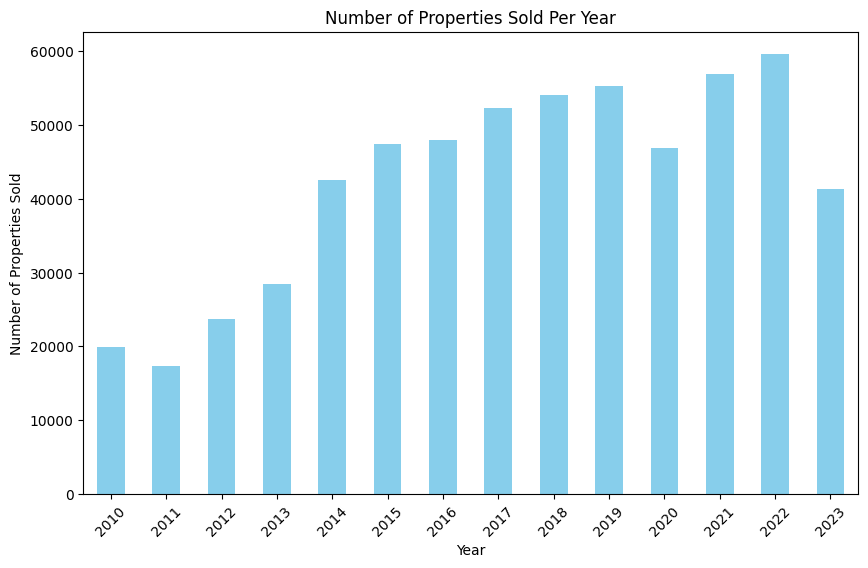

In [2507]:
#Bar chart of properties per year
yearly_counts = property['Date of Sale'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Properties Sold Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.xticks(rotation=45)
plt.show()

### Chart Properties Sold per County

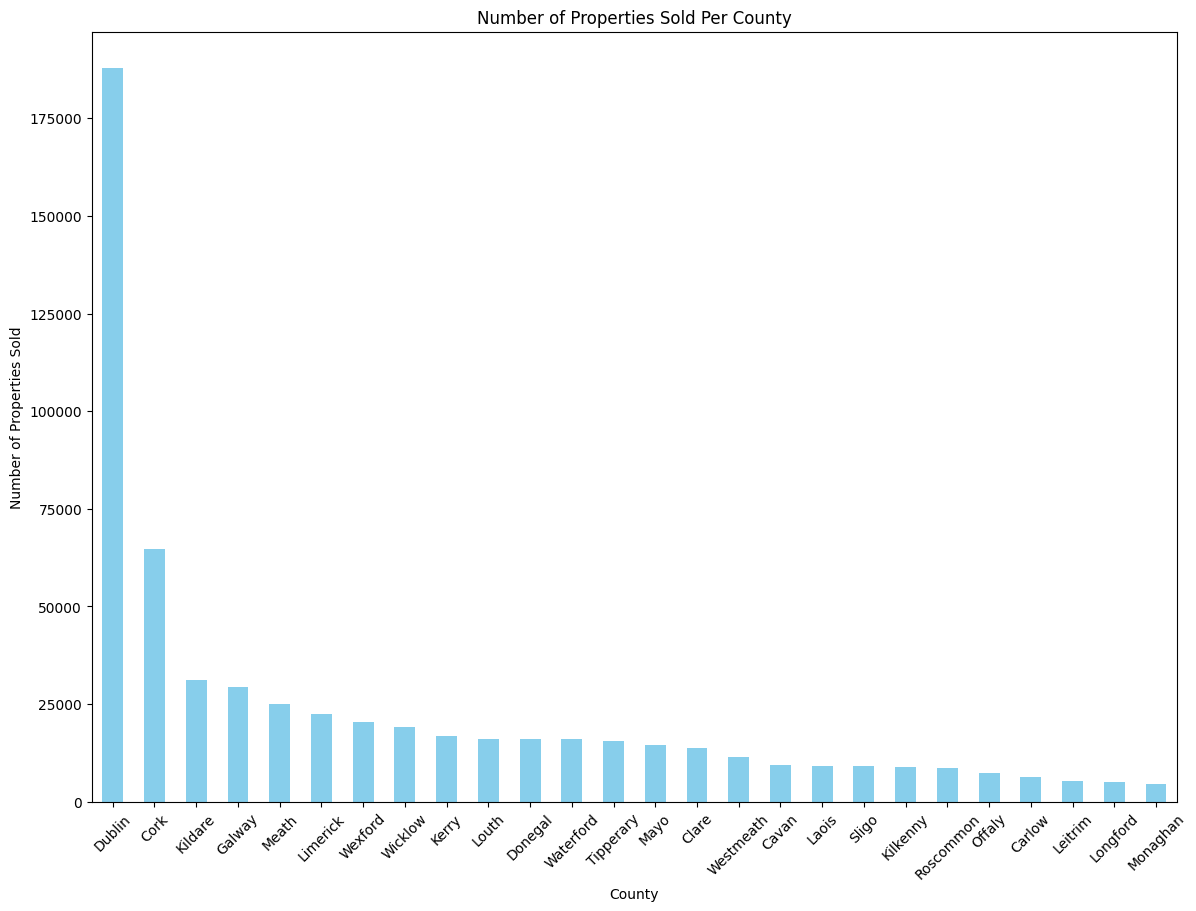

In [2508]:
##House sales by county
#Bar chart of properties per year
property = df
county_counts = property['County'].value_counts()
plt.figure(figsize=(14, 10))
county_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Properties Sold Per County')
plt.xlabel('County')
plt.ylabel('Number of Properties Sold')
plt.xticks(rotation=45)
plt.show()

### House sales by Property Type

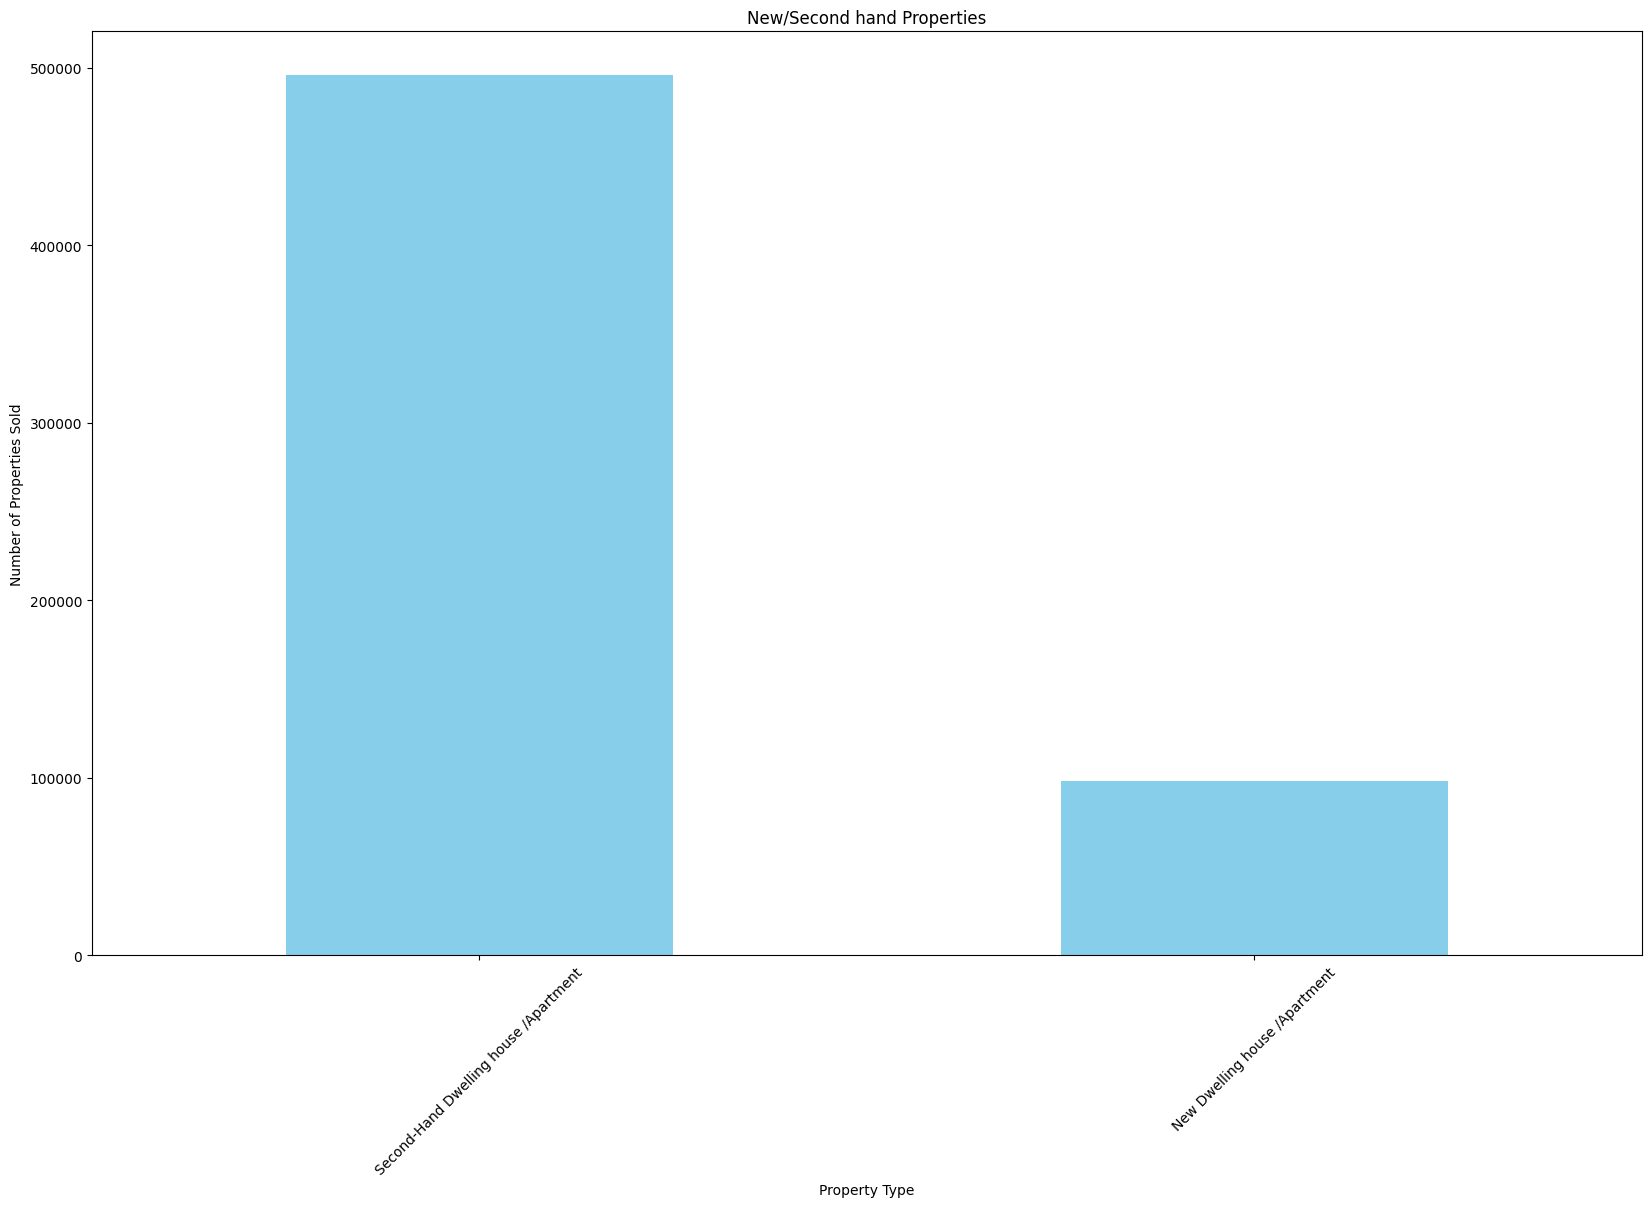

In [2509]:
##House sales by Property Type
#Bar chart of properties per year
secondhand = property['Description of Property'].value_counts()
plt.figure(figsize=(20, 12))
secondhand.plot(kind='bar', color='skyblue')
plt.title('New/Second hand Properties')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties Sold')
plt.xticks(rotation=45)
plt.show()

### Get Aggregates Max, Min and Mean per County

In [2510]:
#Get max min and mean
county_stats = property.groupby('County')['Price'].agg(['max', 'min', 'mean'])
county_stats

,max,min,mean
County,,,
Carlow,5.790000e+06,7500.000,180806.922512
Cavan,5.775477e+06,7000.000,140283.727938
Clare,3.318000e+07,5987.000,184535.886671
Cork,6.770000e+07,5030.530,257383.641127
Donegal,3.051000e+06,5079.000,134596.706473
Dublin,2.070000e+08,5250.000,469113.650811
Galway,3.478100e+07,6250.000,233818.880389
Kerry,1.068035e+07,5250.000,189221.696827
Kildare,3.100000e+07,6348.000,319936.140162


In [2511]:
##Style output https://pandas.pydata.org/docs/user_guide/style.html
county_stats.style.format(precision=2)


,max,min,mean
County,,,
Carlow,5790000.00,7500.00,180806.92
Cavan,5775477.00,7000.00,140283.73
Clare,33180000.00,5987.00,184535.89
Cork,67700000.00,5030.53,257383.64
Donegal,3050999.99,5079.00,134596.71
Dublin,207000000.01,5250.00,469113.65
Galway,34781000.00,6250.00,233818.88
Kerry,10680350.00,5250.00,189221.70
Kildare,30999999.62,6348.00,319936.14


In [2512]:
# output result to clipboard
county_stats.to_clipboard()

### Chart of Max Min Mean per County (not implemented)

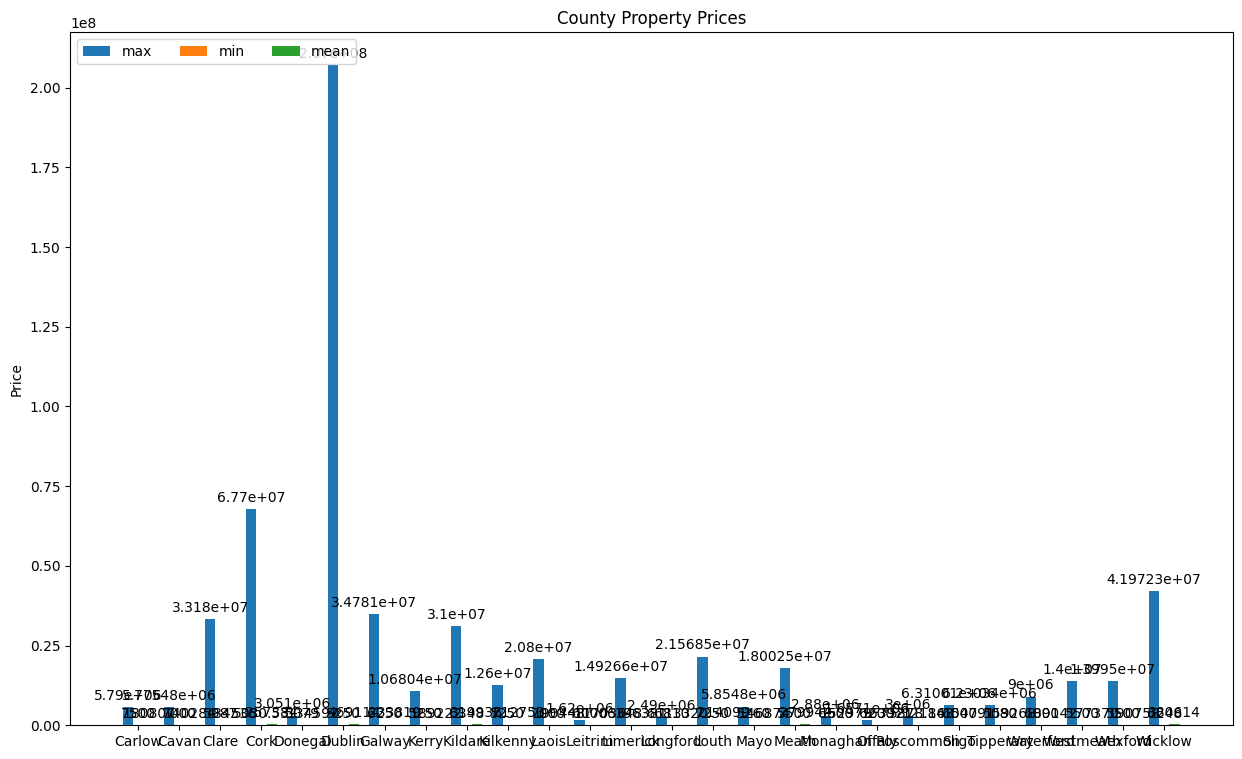

In [2513]:
# Group data by County and calculate max, min, and average property prices
county_stats = property.groupby('County')['Price'].agg(['max', 'min', 'mean'])

# Get labels (County names)
labels = county_stats.index

# Set the number of attributes (max, min, mean)
num_attributes = 3

x = py.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,9))

for i, attribute in enumerate(['max', 'min', 'mean']):
    offset = width * i
    rects = ax.bar(x + offset, county_stats[attribute], width, label=attribute)
    ax.bar_label(rects, padding=3)

# Add some text for labels, title, and custom x-axis tick labels, etc.

ax.set_ylabel('Price')
ax.set_title('County Property Prices')
ax.set_xticks(x + (width * (num_attributes - 1) / 2), labels)
ax.legend(loc='upper left', ncol=num_attributes)
#ax.set_ylim(0, 250)

plt.show()

In [2514]:
#Try group together  - Only new builds have Property Size Descriptions
#Select only two columns
filtered_cols = df.loc[:,['Description of Property', "Property Size Description"]]
grouped_counts = df.groupby(['Description of Property', 'Property Size Description']).size().reset_index(name='Count')
grouped_counts
#grouped_counts.columns = ['Description of Property', "Property Size Description",'Count']
#grouped_counts

,Description of Property,Property Size Description,Count
0,New Dwelling house /Apartment,greater than 125 sq metres,6747
1,New Dwelling house /Apartment,greater than or equal to 125 sq metres,4531
2,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,36877
3,New Dwelling house /Apartment,less than 38 sq metres,3189


### Split out only New Builds

In [2515]:
#Split out only new builds
new_builds = df[df["Description of Property"] == "New Dwelling house /Apartment"]
new_builds.count()

Date of Sale                 98134
Address                      98134
County                       98134
Eircode                       2321
Price                        98134
Description of Property      98134
Property Size Description    51344
dtype: int64

### Split out into four quarters - Changed to Year

In [2516]:
#Split dates into four quarters -> Changed to just year
#Add a column year with datetime year from Date of Sale
new_builds['Year'] = new_builds['Date of Sale'].dt.year
new_builds.head()

C:\Users\SKy\AppData\Local\Temp\ipykernel_14120\937086878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_builds['Year'] = new_builds['Date of Sale'].dt.year


,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description,Year
1,2010-01-03,"134 ASHEWOOD WALK, SUMMERHILL LANE, PORTLAOISE",Laois,NaN,209975.0,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010
10,2010-01-04,"16 AISLING GEAL, FR. RUSSELL ROAD",Limerick,NaN,110000.0,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010
14,2010-01-04,"25 LAVALLIN DRIVE, WHITECHURCH, CORK",Cork,NaN,399520.0,New Dwelling house /Apartment,greater than 125 sq metres,2010
20,2010-01-04,"48 KILLIANS COURT, MULLAGH",Cavan,NaN,138470.0,New Dwelling house /Apartment,greater than 125 sq metres,2010
21,2010-01-04,"49 BALLYNAKELLY GREEN, NEWCASTLE",Dublin,NaN,567046.0,New Dwelling house /Apartment,greater than 125 sq metres,2010


### Drop any new house builds with no property size description

In [2517]:
#Drop any new house builds with no property size description
new_builds = new_builds.drop(new_builds[new_builds['Property Size Description'].isnull()].index)

In [2518]:
#Split monthes into four quarters -> Changed to just year
#if(df['Date of Sale'].dt.month < 4):
#    df['Quarter'] = 1
#elif(df['Date of Sale'].dt.month < 7):
#    df['Quarter'] = 2
#elif(df['Date of Sale'].dt.month < 10):
#    df['Quarter'] = 3
#else:
#    df['Quarter'] = 4

##Cannot apply multiple conditions in this way
#Must use lamda expressions
#12-1 // 3 = 3 + 1 = 4
#8 - 1 // 3 = 2 + 1 = 3
#5 - 1 // 3 = 1 + 1 = 2
#3 - 1 // 3 = 0 + 1 = 1
#new_builds['Quarter'] = new_builds['Date of Sale'].dt.month.apply(lambda x: (x - 1) // 3 + 1)

In [2519]:
# Date of Sale to just year
new_builds['Date of Sale'] = new_builds['Year']

### Drop unneeded columns

In [2520]:
#Final drop rest of unneeded columns
new_builds = new_builds.drop(['Date of Sale', 'Address', 'Eircode', 'Description of Property'],axis=1)

In [2521]:
#View final modification to dataset
new_builds.count()



County                       51344
Price                        51344
Property Size Description    51344
Year                         51344
dtype: int64

In [2522]:
#Reindex new dataset
#Drop flag, drops original index
new_builds = new_builds.reset_index(drop=True)
new_builds

,County,Price,Property Size Description,Year
0,Laois,2.099750e+05,greater than or equal to 38 sq metres and less...,2010
1,Limerick,1.100000e+05,greater than or equal to 38 sq metres and less...,2010
2,Cork,3.995200e+05,greater than 125 sq metres,2010
3,Cavan,1.384700e+05,greater than 125 sq metres,2010
4,Dublin,5.670460e+05,greater than 125 sq metres,2010
...,...,...,...,...
51339,Carlow,1.242000e+06,greater than or equal to 125 sq metres,2021
51340,Cork,4.949996e+05,greater than or equal to 125 sq metres,2021
51341,Galway,4.150000e+05,greater than or equal to 38 sq metres and less...,2021
51342,Galway,4.750000e+05,greater than or equal to 38 sq metres and less...,2021


## Output changes to this dataset

In [2523]:
new_builds.to_csv(fp3)

## Combining in additional datasets

### Read in House Inflation Data

In [2524]:
#Read house inflation data
market = df = pd.read_csv(fp1, encoding='ANSI',engine='python')
market

,DATE,QIEN628BIS
0,2010-01-01,105.2549
1,2010-04-01,101.6796
2,2010-07-01,98.6936
3,2010-10-01,94.3719
4,2011-01-01,90.0501
5,2011-04-01,85.4140
6,2011-07-01,80.3065
7,2011-10-01,75.8275
8,2012-01-01,72.4487
9,2012-04-01,70.7593


### Change quarters to year and average quarter values

In [2525]:
#Add a column year with datetime year from Date of Sale
#market['Year'] = market['Date'].dt.year
#market
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        53 non-null     object 
 1   QIEN628BIS  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 980.0+ bytes


In [2526]:
#Translate to datetime
market['DATE'] = pd.to_datetime(market['DATE'])
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        53 non-null     datetime64[ns]
 1   QIEN628BIS  53 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 980.0 bytes


In [2527]:
#Pull out year
market['Year'] = market['DATE'].dt.year
market

,DATE,QIEN628BIS,Year
0,2010-01-01,105.2549,2010
1,2010-04-01,101.6796,2010
2,2010-07-01,98.6936,2010
3,2010-10-01,94.3719,2010
4,2011-01-01,90.0501,2011
5,2011-04-01,85.4140,2011
6,2011-07-01,80.3065,2011
7,2011-10-01,75.8275,2011
8,2012-01-01,72.4487,2012
9,2012-04-01,70.7593,2012


In [2528]:
#Use Lamda to create bins that match first dataset - Now unneeded
#12-1 // 3 = 3 + 1 = 4
#8 - 1 // 3 = 2 + 1 = 3
#5 - 1 // 3 = 1 + 1 = 2
#3 - 1 // 3 = 0 + 1 = 1
market['Quarter'] = market['DATE'].dt.month.apply(lambda x: (x - 1) // 3 + 1)

#### Drop Date

In [2529]:
#Can now drop date
market = market.drop(["DATE"],axis=1)

#### Average Year values

In [2530]:
#market
market['Inflation'] = market.groupby('Year')['QIEN628BIS'].transform('mean')

In [2531]:
market

,QIEN628BIS,Year,Quarter,Inflation
0,105.2549,2010,1,100.000000
1,101.6796,2010,2,100.000000
2,98.6936,2010,3,100.000000
3,94.3719,2010,4,100.000000
4,90.0501,2011,1,82.899525
5,85.4140,2011,2,82.899525
6,80.3065,2011,3,82.899525
7,75.8275,2011,4,82.899525
8,72.4487,2012,1,71.741500
9,70.7593,2012,2,71.741500


In [2532]:
#Merge datasets
#on specify columns for matching
#how specify left join
#combine = new_builds.merge(market[['Year','Quarter','QIEN628BIS']], on=['Year','Quarter'], how='left')
combine = new_builds.merge(market[['Year','Inflation']], on=['Year'], how='right')

In [2533]:
#Check new dataset
#Min value
#combine['QIEN628BIS'].min()
combine['Inflation'].min()

71.7415

In [2534]:
#Max Value
#combine['QIEN628BIS'].max()
combine['Inflation'].max()

157.7841

In [2535]:
combine

,County,Price,Property Size Description,Year,Inflation
0,Laois,209975.0,greater than or equal to 38 sq metres and less...,2010,100.000000
1,Limerick,110000.0,greater than or equal to 38 sq metres and less...,2010,100.000000
2,Cork,399520.0,greater than 125 sq metres,2010,100.000000
3,Cavan,138470.0,greater than 125 sq metres,2010,100.000000
4,Dublin,567046.0,greater than 125 sq metres,2010,100.000000
...,...,...,...,...,...
205372,Cork,363200.0,greater than or equal to 125 sq metres,2022,154.719575
205373,Cork,363200.0,greater than or equal to 125 sq metres,2022,154.719575
205374,Cork,363200.0,greater than or equal to 125 sq metres,2022,154.719575
205375,Cork,363200.0,greater than or equal to 125 sq metres,2022,154.719575


In [2536]:
#This code for normalisation from https://www.geeksforgeeks.org/data-normalization-with-pandas/
#combine['QIEN628BIS'] = combine['QIEN628BIS']  / combine['QIEN628BIS'].abs().max()
combine['Inflation'] = combine['Inflation']  / combine['Inflation'].abs().max()


In [2537]:
#Check values
#combine['QIEN628BIS'].max()
combine['Inflation'].max()

1.0

In [2538]:
#combine['QIEN628BIS'].min()
#ombine['Inflation'].min()
#Check if this is correct 
#min was 70.0913/
#max was 158.9234 = 44.1... correct

In [2539]:
#Add in next dataset
combine['Year'].min()

2010

## Analysing Census Data


### Read in Census Data

In [2540]:
#Read census data
census = pd.read_csv(FOLDER + fn4, encoding='UTF-8', engine='python')

### Analyse Data

In [2541]:
#View it
census['CensusYear'].max()

2022

### Chart Census Data over Time

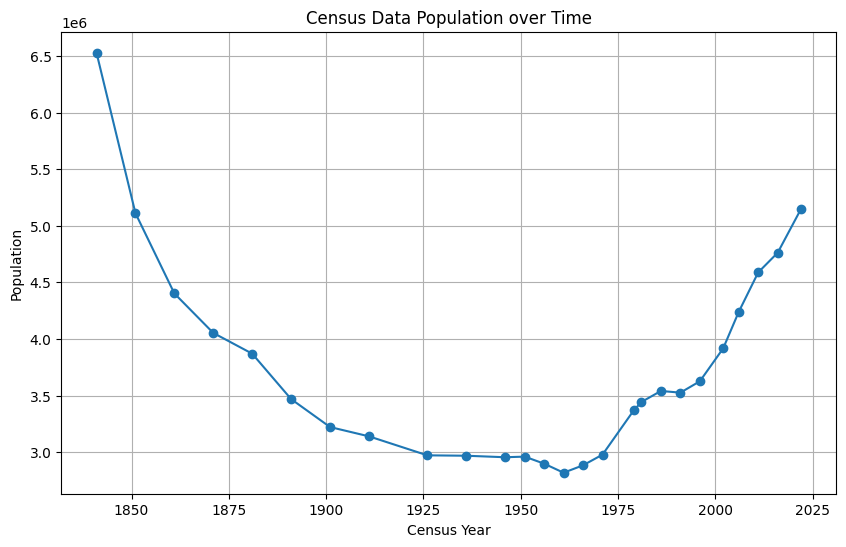

In [2542]:
#Visualise census data
# Filter the data for the "State" County
state_data = census[census['County'] == "State"]

# Extract the "Census Year" and "VALUE" columns
census_year = state_data['CensusYear']
value = state_data['VALUE']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(census_year, value, marker='o', linestyle='-')
plt.title('Census Data Population over Time')
plt.xlabel('Census Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

### Fill in Missing Years to Smooth Data

In [2543]:
#Test code element by element
#Have to respecify a column, so if any are null return true
#not working
#if (census[census['CensusYear'] == 2021]['VALUE'].isnull().values.any()):
#So if dataframe of null values is not empty
check = census[census['CensusYear'] == 2021].isnull().all()
if check['CensusYear'] == True:
    print("true")
else:
    print("false")

true


In [2544]:
#How is this working, ok returns a dataframe of values
check = census[census['CensusYear'] == 1842].isnull().all()
check['CensusYear'] == False

False

In [2545]:
#Ok now loop through rows
start_year = 1841
end_year = 2022

#Loop through years and check if exists
for year in range(start_year, end_year):

    check = census[census['CensusYear'] == year].isnull().all()
    if check['CensusYear'] == False:
        print("Year " + str(year) +" exists is true")
    else:
        print("Year " + str(year) +" exists is false")


Year 1841 exists is true
Year 1842 exists is false
Year 1843 exists is false
Year 1844 exists is false
Year 1845 exists is false
Year 1846 exists is false
Year 1847 exists is false
Year 1848 exists is false
Year 1849 exists is false
Year 1850 exists is false
Year 1851 exists is true
Year 1852 exists is false
Year 1853 exists is false
Year 1854 exists is false
Year 1855 exists is false
Year 1856 exists is false
Year 1857 exists is false
Year 1858 exists is false
Year 1859 exists is false
Year 1860 exists is false
Year 1861 exists is true
Year 1862 exists is false
Year 1863 exists is false
Year 1864 exists is false
Year 1865 exists is false
Year 1866 exists is false
Year 1867 exists is false
Year 1868 exists is false
Year 1869 exists is false
Year 1870 exists is false
Year 1871 exists is true
Year 1872 exists is false
Year 1873 exists is false
Year 1874 exists is false
Year 1875 exists is false
Year 1876 exists is false
Year 1877 exists is false
Year 1878 exists is false
Year 1879 exists

In [2546]:
#Okay now copy all rows that exist to rows that don't exist
#Create new rows
new_rows = census[census['CensusYear'] == 1841].copy()
#Set VALUE to 0
new_rows['VALUE'] = 0
new_rows

,Statistic Label,CensusYear,County,Sex,UNIT,VALUE
0,Population at Each Census,1841,State,Both sexes,Number,0
1,Population at Each Census,1841,Carlow,Both sexes,Number,0
2,Population at Each Census,1841,Dublin,Both sexes,Number,0
3,Population at Each Census,1841,Kildare,Both sexes,Number,0
4,Population at Each Census,1841,Kilkenny,Both sexes,Number,0
5,Population at Each Census,1841,Laois,Both sexes,Number,0
6,Population at Each Census,1841,Longford,Both sexes,Number,0
7,Population at Each Census,1841,Louth,Both sexes,Number,0
8,Population at Each Census,1841,Meath,Both sexes,Number,0
9,Population at Each Census,1841,Offaly,Both sexes,Number,0


### Create Missing Years to fill gaps

In [2547]:

#Ok now loop through rows
start_year = 1841
end_year = 2022

#Loop through years and check if exists
for year in range(start_year, end_year):

    check = census[census['CensusYear'] == year].isnull().all()
    if check['CensusYear'] == True:
        #Create new rows for previous year
        new_rows = census[census['CensusYear'] == year-1].copy()
        #Set VALUE to 0
        new_rows['VALUE'] = 0
        #Set Year to +1
        new_rows['CensusYear'] = year
        new_rows
        #Now add to census
        census = pd.concat([census, new_rows])

# Sort by 'CensusYear' if needed
census = census.sort_values(by='CensusYear')

# Reset index
census = census.reset_index(drop=True)  


In [2623]:
#Check census
census[census["CensusYear"]==2022]

,Statistic Label,CensusYear,County,Sex,UNIT,VALUE
4887,Population at Each Census,2022,Cavan,Both sexes,Number,81704.0
4888,Population at Each Census,2022,Sligo,Both sexes,Number,70198.0
4889,Population at Each Census,2022,Roscommon,Both sexes,Number,70259.0
4890,Population at Each Census,2022,Mayo,Both sexes,Number,137970.0
4891,Population at Each Census,2022,Leitrim,Both sexes,Number,35199.0
4892,Population at Each Census,2022,Galway,Both sexes,Number,277737.0
4893,Population at Each Census,2022,Waterford,Both sexes,Number,127363.0
4894,Population at Each Census,2022,Tipperary,Both sexes,Number,167895.0
4895,Population at Each Census,2022,Limerick,Both sexes,Number,209536.0
4896,Population at Each Census,2022,Kerry,Both sexes,Number,156458.0


In [2549]:

#Get values for counties
county = census[census['CensusYear'] == 1841]['County'].values
county

#Get value for year
yearValues = census[census['CensusYear'] == 1841]
yearValues[yearValues['County'] == "Dublin"]['VALUE'].values[0]
#Loop through county values
for c in county:
    yearValues = census[census['CensusYear'] == 1841]
    value = yearValues[yearValues['County'] == c]['VALUE'].values[0]
    print(value)

6528799
296448
243158
180886
253591
388887
155297
440198
196187
435553
330029
293880
854118
200442
126143
86228
372773
114488
286394
153930
202420
128240
183828
146857
141300
202033
115491


In [2550]:
#Boolean for all 0 values
yearValues = census[census['CensusYear'] == 1842]
check = yearValues[yearValues['County'] == "Dublin"]['VALUE'].values[0] == 0
check

True

In [2551]:
#Get specific value
yearValues = census[(census['CensusYear'] == 1842) & (census['County'] == 'Dublin')]
yearValues['VALUE'].values[0]

0

In [2552]:
start_year = 1841
end_year = 1860

#Get values for counties
county = census[census['CensusYear'] == start_year]['County'].values

#Loop through years
for year in range (start_year, end_year-1):
    #Loop through counties for year
    for c in county:
        yearValues = census[(census['CensusYear'] == year) & (census['County'] == c)]
        value = yearValues['VALUE'].values[0]
        #If 0 zero value
        if value == 0:
            # Get the next non-zero value
            next_year = year + 1
            next_value = 0
            for y in range(year + 1, end_year):
                next_year_values = census[(census['CensusYear'] == y) & (census['County'] == c)]
                next_value = next_year_values['VALUE'].values[0]
                if next_value != 0:
                    next_year = y
                    break

            print(f"Year: {year}, County: {c}, Next Year: {next_year}, Next Value: {next_value}")

Year: 1842, County: State, Next Year: 1851, Next Value: 5111557
Year: 1842, County: Donegal, Next Year: 1851, Next Value: 255158
Year: 1842, County: Cavan, Next Year: 1851, Next Value: 174071
Year: 1842, County: Sligo, Next Year: 1851, Next Value: 128515
Year: 1842, County: Roscommon, Next Year: 1851, Next Value: 173436
Year: 1842, County: Mayo, Next Year: 1851, Next Value: 274499
Year: 1842, County: Leitrim, Next Year: 1851, Next Value: 111897
Year: 1842, County: Galway, Next Year: 1851, Next Value: 321684
Year: 1842, County: Waterford, Next Year: 1851, Next Value: 164035
Year: 1842, County: Tipperary, Next Year: 1851, Next Value: 331567
Year: 1842, County: Limerick, Next Year: 1851, Next Value: 262132
Year: 1842, County: Kerry, Next Year: 1851, Next Value: 238254
Year: 1842, County: Cork, Next Year: 1851, Next Value: 649308
Year: 1842, County: Monaghan, Next Year: 1851, Next Value: 141823
Year: 1842, County: Wicklow, Next Year: 1851, Next Value: 98979
Year: 1842, County: Carlow, Next

### Now fill missing years values by dividing gap by number of years

In [2553]:
# Find the years with missing and non-missing years
missing_years = census[census['VALUE'] == 0]['CensusYear'].unique()
years = census[census['VALUE'] != 0]['CensusYear'].unique()

# Find the counties
counties = census[census['VALUE'] != 0]['County'].unique()

# Iterate through the counties
for county in counties:
    # Iterate through the missing years
    for missing_year in missing_years:

        # Find the closest previous and next years
        previous_years = years[years < missing_year]
        next_years = years[years > missing_year]

        #Account for end and beginning
        previous_year = previous_years.max() if previous_years.size > 0 else None
        next_year = next_years.min() if next_years.size > 0 else None

        #So if neither are none
        if previous_year and next_year:
            # Get previous and next values
            previous_value = census[(census['CensusYear'] == previous_year) & (census['County'] == county)]['VALUE'].values[0]
            next_value = census[(census['CensusYear'] == next_year) & (census['County'] == county)]['VALUE'].values[0]

            # Calc gap and gap value
            gap = next_year - previous_year
            gap_value = next_value - previous_value
            #Calc missing value
            filled_value = previous_value + (gap_value / gap) * (missing_year - previous_year)

            # Insert missing value
            census.loc[(census['CensusYear'] == missing_year) & (census['County'] == county), 'VALUE'] = filled_value


C:\Users\SKy\AppData\Local\Temp\ipykernel_14120\3025153143.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6387074.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  census.loc[(census['CensusYear'] == missing_year) & (census['County'] == county), 'VALUE'] = filled_value


### Output New Chart

In [2554]:
#census[census['County'] == 'State']
census.loc[census['County'] == 'State', 'VALUE']

0       6.528799e+06
53      6.387075e+06
69      6.245351e+06
97      6.103626e+06
123     5.961902e+06
            ...     
4780    4.890956e+06
4824    4.955502e+06
4853    5.020048e+06
4882    5.084593e+06
4911    5.149139e+06
Name: VALUE, Length: 182, dtype: float64

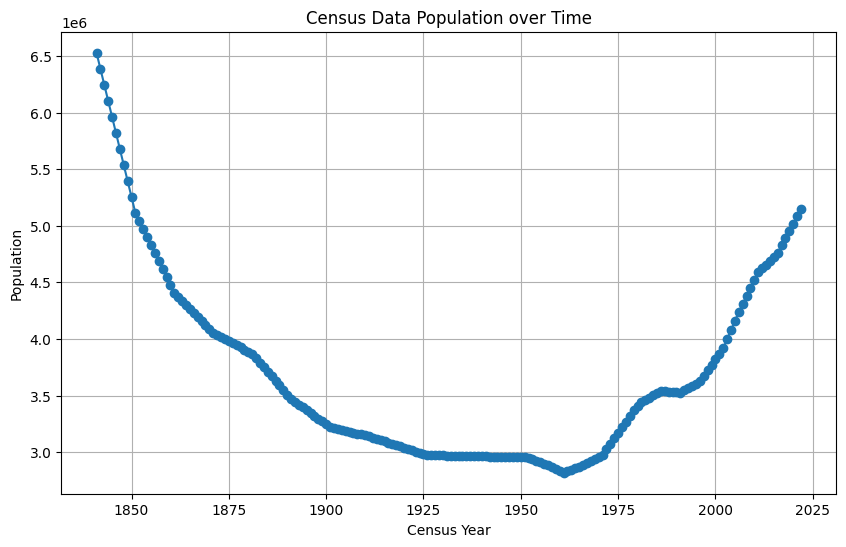

In [2555]:
# Extract the "Census Year" and "VALUE" columns
census_year = census.loc[census['County'] == 'State', 'CensusYear']
value = census.loc[census['County'] == 'State', 'VALUE']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(census_year, value, marker='o')
plt.title('Census Data Population over Time')
plt.xlabel('Census Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

## Out updated census values to file

In [2556]:
#Output updated census with filled values
census.to_csv(FOLDER_PRO+ fn5)


In [2557]:
# Convert to int ignoring errors
census['VALUE'] = census['VALUE'].astype('Int32',errors='ignore')

In [2558]:
combine

,County,Price,Property Size Description,Year,Inflation
0,Laois,209975.0,greater than or equal to 38 sq metres and less...,2010,0.633777
1,Limerick,110000.0,greater than or equal to 38 sq metres and less...,2010,0.633777
2,Cork,399520.0,greater than 125 sq metres,2010,0.633777
3,Cavan,138470.0,greater than 125 sq metres,2010,0.633777
4,Dublin,567046.0,greater than 125 sq metres,2010,0.633777
...,...,...,...,...,...
205372,Cork,363200.0,greater than or equal to 125 sq metres,2022,0.980578
205373,Cork,363200.0,greater than or equal to 125 sq metres,2022,0.980578
205374,Cork,363200.0,greater than or equal to 125 sq metres,2022,0.980578
205375,Cork,363200.0,greater than or equal to 125 sq metres,2022,0.980578


In [2559]:
combine[ (combine['County']=='Laois') & (combine['Year']==2018)]

,County,Price,Property Size Description,Year,Inflation
168074,Laois,167980.00000,greater than or equal to 38 sq metres and less...,2018,0.785359
168123,Laois,210001.10500,greater than or equal to 38 sq metres and less...,2018,0.785359
168202,Laois,71350.07250,greater than or equal to 38 sq metres and less...,2018,0.785359
168496,Laois,199999.48500,greater than or equal to 38 sq metres and less...,2018,0.785359
168518,Laois,126999.99645,greater than or equal to 38 sq metres and less...,2018,0.785359
...,...,...,...,...,...
204793,Laois,194085.00000,greater than or equal to 38 sq metres and less...,2018,0.785359
204796,Laois,194085.00000,greater than or equal to 38 sq metres and less...,2018,0.785359
204799,Laois,194085.00000,greater than or equal to 38 sq metres and less...,2018,0.785359
204801,Laois,194085.00000,greater than or equal to 38 sq metres and less...,2018,0.785359


In [2560]:
#Merge datasets again
#on specify columns for matching
#how specify left join
next_combine = combine.merge(census[['CensusYear', 'County', 'VALUE']], left_on=['Year', 'County'], right_on=['CensusYear', 'County'], how='right')

In [2561]:
#Check combination
#next_combine
#next_combine[(next_combine['CensusYear'] ==2021)]
next_combine[(next_combine['CensusYear'] ==2020) & (next_combine['County'] == 'Laois')]

,County,Price,Property Size Description,Year,Inflation,CensusYear,VALUE
209910,Laois,NaN,NaN,NaN,NaN,2020,89483.666667


## Read in Avg House Price from 1975

In [2562]:
avg_price = pd.read_csv(fp4, encoding='ANSI',engine='python')

### Get mean of quarters - first get rid of last digit of TLIST(Q1)

In [2563]:
#Use string slicking to get rid of last digit
avg_price['TLIST(Q1)'] = avg_price['TLIST(Q1)'].astype(str).str[:-1]
avg_price

,"ï»¿""STATISTIC""",Statistic Label,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE
0,HSQ06C1,New House Prices,1975,1975Q1,-,National,Euro,11887.0
1,HSQ06C1,New House Prices,1975,1975Q1,01,Dublin,Euro,11858.0
2,HSQ06C1,New House Prices,1975,1975Q1,02,Cork,Euro,10667.0
3,HSQ06C1,New House Prices,1975,1975Q1,03,Galway,Euro,13519.0
4,HSQ06C1,New House Prices,1975,1975Q1,04,Limerick,Euro,12565.0
...,...,...,...,...,...,...,...,...
2347,HSQ06C2,Second Hand House Prices,2016,2016Q4,02,Cork,Euro,247326.0
2348,HSQ06C2,Second Hand House Prices,2016,2016Q4,03,Galway,Euro,218284.0
2349,HSQ06C2,Second Hand House Prices,2016,2016Q4,04,Limerick,Euro,195324.0
2350,HSQ06C2,Second Hand House Prices,2016,2016Q4,05,Waterford,Euro,183151.0


### Remove Second Hand House Prices

In [2565]:
avg_price = avg_price[avg_price['Statistic Label'] != 'Second Hand House Prices']

### Group by year

In [2566]:
#Group by year and get mean value
avg_price['VALUE'] = avg_price.groupby(['TLIST(Q1)','Area'])['VALUE'].transform('mean')

### Drop unnecessary rows

In [2567]:
avg_price = avg_price.drop(['ï»¿"STATISTIC"', 'Statistic Label', 'Quarter', 'C02343V02817', 'UNIT'], axis=1)

### Remove Duplicate rows

In [2568]:
avg_price = avg_price.drop_duplicates(subset=["TLIST(Q1)","Area","VALUE"])

In [2569]:
avg_price['Area'].unique() ##Other areas -> every other county

array(['National', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other areas'], dtype=object)

In [2570]:
#avg_price.info()
#next_combine.info()
avg_price['TLIST(Q1)'] = avg_price['TLIST(Q1)'].astype('Int32')
avg_price['VALUE']

0        12971.25
1        12912.50
2        12389.75
3        14312.25
4        13064.75
          ...    
1150    291937.25
1151    262549.50
1152    238080.25
1153    234042.00
1154    272038.25
Name: VALUE, Length: 294, dtype: float64

### Rename Columns

In [2571]:
avg_price = avg_price.rename(columns={"TLIST(Q1)":"Year"})
avg_price = avg_price.rename(columns={"VALUE":"Average"})

In [2572]:
next_combine

,County,Price,Property Size Description,Year,Inflation,CensusYear,VALUE
0,State,NaN,NaN,NaN,NaN,1841,6528799.0
1,Donegal,NaN,NaN,NaN,NaN,1841,296448.0
2,Cavan,NaN,NaN,NaN,NaN,1841,243158.0
3,Sligo,NaN,NaN,NaN,NaN,1841,180886.0
4,Roscommon,NaN,NaN,NaN,NaN,1841,253591.0
...,...,...,...,...,...,...,...
210028,Dublin,NaN,NaN,NaN,NaN,2022,1458154.0
210029,Carlow,NaN,NaN,NaN,NaN,2022,61968.0
210030,State,NaN,NaN,NaN,NaN,2022,5149139.0
210031,Monaghan,NaN,NaN,NaN,NaN,2022,65288.0


In [2573]:
#next_combine = next_combine.drop(['CensusYear'], axis=1)
next_combine = next_combine.rename(columns={"VALUE":"Population"})

In [2574]:
avg_price = avg_price.rename(columns={"Year":"CensusYear"})

### Merge datasets to add average (do other areas seperates)

In [2575]:
next_combine = pd.merge(next_combine, avg_price[['CensusYear','Area','Average']], left_on=['CensusYear', 'County'], right_on=['CensusYear', 'Area'], how='left')

In [2577]:
next_combine[next_combine['CensusYear'] == 1975]

,County,Price,Property Size Description,Year,Inflation,CensusYear,Population,Area,Average
3618,Kildare,NaN,NaN,NaN,NaN,1975,84581.0,NaN,NaN
3619,State,NaN,NaN,NaN,NaN,1975,3173232.5,NaN,NaN
3620,Dublin,NaN,NaN,NaN,NaN,1975,917951.0,Dublin,12912.50
3621,Louth,NaN,NaN,NaN,NaN,1975,80543.0,NaN,NaN
3622,Carlow,NaN,NaN,NaN,NaN,1975,36452.5,NaN,NaN
3623,Westmeath,NaN,NaN,NaN,NaN,1975,56727.5,NaN,NaN
3624,Longford,NaN,NaN,NaN,NaN,1975,29517.5,NaN,NaN
3625,Laois,NaN,NaN,NaN,NaN,1975,47597.5,NaN,NaN
3626,Kilkenny,NaN,NaN,NaN,NaN,1975,65314.5,NaN,NaN
3627,Wexford,NaN,NaN,NaN,NaN,1975,91386.0,NaN,NaN


### Drop state rows

In [2579]:
next_combine = next_combine[next_combine['County'] != 'State']

In [2580]:
# Remove everything but Other areas
avg_price = avg_price[avg_price['Area'] == 'Other areas']
avg_price

,CensusYear,Area,Average
6,1975,Other areas,12929.25
34,1976,Other areas,15434.00
62,1977,Other areas,17951.25
90,1978,Other areas,22867.50
118,1979,Other areas,27148.75
146,1980,Other areas,32830.00
174,1981,Other areas,37941.25
202,1982,Other areas,42855.00
230,1983,Other areas,43468.00
258,1984,Other areas,43749.75


### Merge Other Areas

In [ ]:
# Align the DataFrames
#merged_df
#avg_price
#avg_price, merged_df = avg_price.align(merged_df[['Year', 'Average']], join='left', axis=1)

In [2581]:
## Now merge datasets based on year to fill other areas
next_combine = pd.merge(next_combine, avg_price[['CensusYear', 'Average']], on='CensusYear', how='left')

In [2585]:
#Rename and drop year columns
next_combine = next_combine.drop(['Year'], axis=1)
next_combine = next_combine.rename(columns={"CensusYear":"Year"})

In [2586]:
next_combine

,County,Price,Property Size Description,Inflation,Year,Population,Area,Average_x,Average_y
0,Donegal,NaN,NaN,NaN,1841,296448.0,NaN,NaN,NaN
1,Cavan,NaN,NaN,NaN,1841,243158.0,NaN,NaN,NaN
2,Sligo,NaN,NaN,NaN,1841,180886.0,NaN,NaN,NaN
3,Roscommon,NaN,NaN,NaN,1841,253591.0,NaN,NaN,NaN
4,Mayo,NaN,NaN,NaN,1841,388887.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
209846,Kildare,NaN,NaN,NaN,2022,247774.0,NaN,NaN,NaN
209847,Dublin,NaN,NaN,NaN,2022,1458154.0,NaN,NaN,NaN
209848,Carlow,NaN,NaN,NaN,2022,61968.0,NaN,NaN,NaN
209849,Monaghan,NaN,NaN,NaN,2022,65288.0,NaN,NaN,NaN


In [2588]:
min(next_combine['Year'])

1841

In [2589]:
#Now fill NaN Average_x with Average_y
next_combine['Average_x'] = next_combine['Average_x'].fillna(next_combine['Average_y'])

### Rename and drop unncessary columns

In [2590]:
next_combine = next_combine.drop(['Area','Average_y'], axis=1)
next_combine = next_combine.rename(columns={"Average_x":"Average"})

In [2591]:
next_combine[next_combine['County']=='Dublin']

,County,Price,Property Size Description,Inflation,Year,Population,Average
15,Dublin,NaN,NaN,NaN,1841,3.727730e+05,NaN
48,Dublin,NaN,NaN,NaN,1842,3.760104e+05,NaN
68,Dublin,NaN,NaN,NaN,1843,3.792478e+05,NaN
94,Dublin,NaN,NaN,NaN,1844,3.824852e+05,NaN
120,Dublin,NaN,NaN,NaN,1845,3.857226e+05,NaN
...,...,...,...,...,...,...,...
209810,Dublin,2.942796e+06,greater than or equal to 125 sq metres,0.873195,2021,1.439688e+06,NaN
209811,Dublin,2.336285e+06,greater than or equal to 125 sq metres,0.873195,2021,1.439688e+06,NaN
209812,Dublin,2.942796e+06,greater than or equal to 125 sq metres,0.873195,2021,1.439688e+06,NaN
209813,Dublin,2.336285e+06,greater than or equal to 125 sq metres,0.873195,2021,1.439688e+06,NaN


## Read in next Area dataset

In [2592]:
#Next dataset to combine
area = pd.read_csv(FOLDER + fn6)

In [2593]:
area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           26 non-null     int64  
 1   OBJECTID      26 non-null     int64  
 2   CO_ID         26 non-null     int64  
 3   ENGLISH       26 non-null     object 
 4   GAEILGE       26 non-null     object 
 5   LOGAINM_ID    26 non-null     int64  
 6   GUID          26 non-null     object 
 7   CONTAE        26 non-null     object 
 8   COUNTY        26 non-null     object 
 9   PROVINCE      26 non-null     object 
 10  CENTROID_X    26 non-null     float64
 11  CENTROID_Y    26 non-null     float64
 12  AREA          26 non-null     float64
 13  SHAPE_Length  26 non-null     float64
 14  SHAPE_Area    26 non-null     float64
dtypes: float64(5), int64(4), object(6)
memory usage: 3.2+ KB


### Convert County to type string

In [2594]:
#Convert type to string
#Handy guide https://pandas.pydata.org/docs/user_guide/text.html
next_combine['County'] = next_combine['County'].astype(dtype="string")

### Capitalise County

In [2595]:
#Capitilise county
next_combine['County'] = next_combine['County'].str.upper()

In [2596]:
next_combine

,County,Price,Property Size Description,Inflation,Year,Population,Average
0,DONEGAL,NaN,NaN,NaN,1841,296448.0,NaN
1,CAVAN,NaN,NaN,NaN,1841,243158.0,NaN
2,SLIGO,NaN,NaN,NaN,1841,180886.0,NaN
3,ROSCOMMON,NaN,NaN,NaN,1841,253591.0,NaN
4,MAYO,NaN,NaN,NaN,1841,388887.0,NaN
...,...,...,...,...,...,...,...
209846,KILDARE,NaN,NaN,NaN,2022,247774.0,NaN
209847,DUBLIN,NaN,NaN,NaN,2022,1458154.0,NaN
209848,CARLOW,NaN,NaN,NaN,2022,61968.0,NaN
209849,MONAGHAN,NaN,NaN,NaN,2022,65288.0,NaN


### Convert area to km2

In [2597]:
#Convert area to km2
area['AREA'] = area['AREA']/1000000

In [2598]:
area

,_id,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Length,SHAPE_Area
0,1,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4860.754357,1.859119e+06,4.860754e+09
1,2,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2754.925825,3.897987e+05,2.754926e+09
2,3,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1694.083233,2.970485e+05,1.694083e+09
3,4,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1857.037814,4.572206e+05,1.857038e+09
4,5,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,925.760879,3.661986e+05,9.257609e+08
5,6,6,230000,WESTMEATH,An Iarmhí,100016,2ae19629-144c-13a3-e055-000000000001,An Iarmhí,WESTMEATH,Leinster,635445.42,756679.97,1838.309833,2.916598e+05,1.838310e+09
6,7,7,170000,MONAGHAN,Muineachán,100025,2ae19629-1445-13a3-e055-000000000001,Muineachán,MONAGHAN,Ulster,669110.41,824170.57,1294.164121,3.009820e+05,1.294164e+09
7,8,8,250000,WICKLOW,Cill Mhantáin,100008,2ae19629-144e-13a3-e055-000000000001,Cill Mhantáin,WICKLOW,Leinster,707784.79,690738.10,2025.160942,3.206300e+05,2.025161e+09
8,9,9,40000,CORK,Corcaigh,100010,2ae19629-1451-13a3-e055-000000000001,Corcaigh,CORK,Munster,527532.69,573117.78,7502.635495,1.962542e+06,7.502635e+09
9,10,10,70000,KERRY,Ciarraí,100005,2ae19629-1454-13a3-e055-000000000001,Ciarraí,KERRY,Munster,469696.21,600519.77,4812.988563,1.521123e+06,4.812989e+09


### Merge Area dataset

In [2599]:
#Merge datasets again
#on specify columns for matching
#how specify left join
nxt_combine = next_combine.merge(area[['ENGLISH','AREA']], left_on=['County'], right_on=['ENGLISH'], how='left')

In [2600]:
nxt_combine

,County,Price,Property Size Description,Inflation,Year,Population,Average,ENGLISH,AREA
0,DONEGAL,NaN,NaN,NaN,1841,296448.0,NaN,DONEGAL,4860.754357
1,CAVAN,NaN,NaN,NaN,1841,243158.0,NaN,CAVAN,1931.224564
2,SLIGO,NaN,NaN,NaN,1841,180886.0,NaN,SLIGO,1836.083206
3,ROSCOMMON,NaN,NaN,NaN,1841,253591.0,NaN,ROSCOMMON,2547.136217
4,MAYO,NaN,NaN,NaN,1841,388887.0,NaN,MAYO,5587.525209
...,...,...,...,...,...,...,...,...,...
209846,KILDARE,NaN,NaN,NaN,2022,247774.0,NaN,KILDARE,1694.083233
209847,DUBLIN,NaN,NaN,NaN,2022,1458154.0,NaN,DUBLIN,925.760879
209848,CARLOW,NaN,NaN,NaN,2022,61968.0,NaN,CARLOW,896.306186
209849,MONAGHAN,NaN,NaN,NaN,2022,65288.0,NaN,MONAGHAN,1294.164121


### Calculate Population Density

In [2601]:
#Calc pop density
nxt_combine['Population Density'] = (nxt_combine['Population'] / nxt_combine['AREA']).round(2)
nxt_combine

,County,Price,Property Size Description,Inflation,Year,Population,Average,ENGLISH,AREA,Population Density
0,DONEGAL,NaN,NaN,NaN,1841,296448.0,NaN,DONEGAL,4860.754357,60.99
1,CAVAN,NaN,NaN,NaN,1841,243158.0,NaN,CAVAN,1931.224564,125.91
2,SLIGO,NaN,NaN,NaN,1841,180886.0,NaN,SLIGO,1836.083206,98.52
3,ROSCOMMON,NaN,NaN,NaN,1841,253591.0,NaN,ROSCOMMON,2547.136217,99.56
4,MAYO,NaN,NaN,NaN,1841,388887.0,NaN,MAYO,5587.525209,69.60
...,...,...,...,...,...,...,...,...,...,...
209846,KILDARE,NaN,NaN,NaN,2022,247774.0,NaN,KILDARE,1694.083233,146.26
209847,DUBLIN,NaN,NaN,NaN,2022,1458154.0,NaN,DUBLIN,925.760879,1575.09
209848,CARLOW,NaN,NaN,NaN,2022,61968.0,NaN,CARLOW,896.306186,69.14
209849,MONAGHAN,NaN,NaN,NaN,2022,65288.0,NaN,MONAGHAN,1294.164121,50.45


### Drop ENGLISH column

In [2602]:
#Drop ENGLISH column
nxt_combine = nxt_combine.drop(columns=['ENGLISH'])

## Output Changes

In [2603]:
#Output changes to csv
nxt_combine.to_csv(fp3)

## Data Visualisations

### Property Sizes Chart

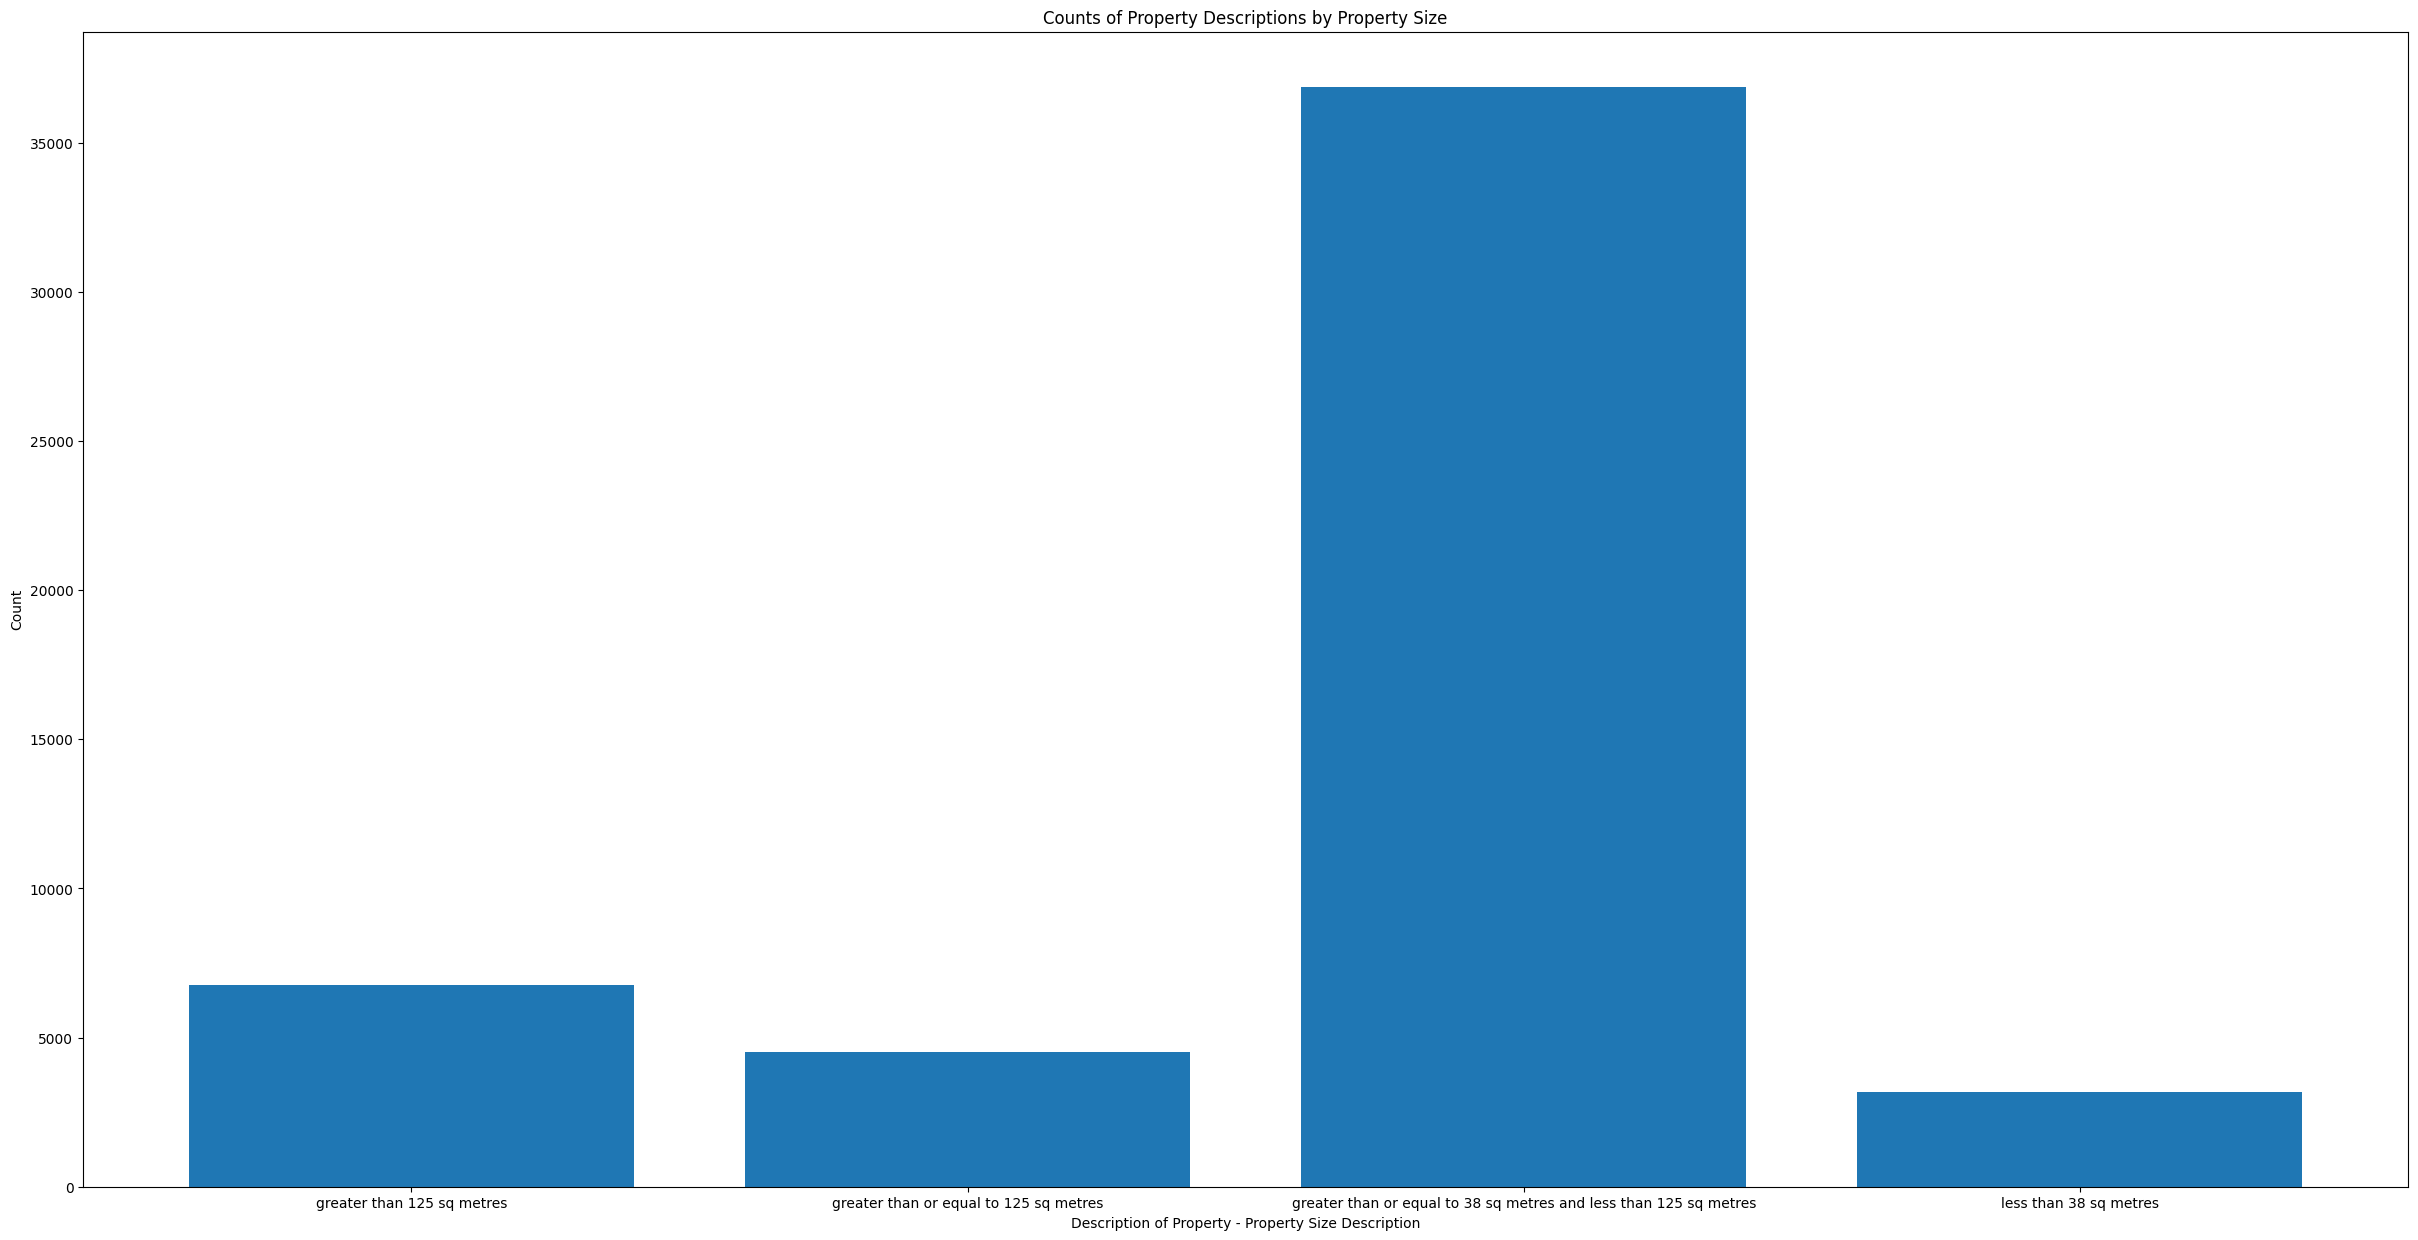

In [2604]:
#Data Visualisations
# Create a bar graph

plt.figure(figsize=(30, 15))
plt.bar( grouped_counts['Property Size Description'], grouped_counts['Count'])
plt.xlabel('Description of Property - Property Size Description')
plt.ylabel('Count')
plt.title('Counts of Property Descriptions by Property Size')
plt.show()

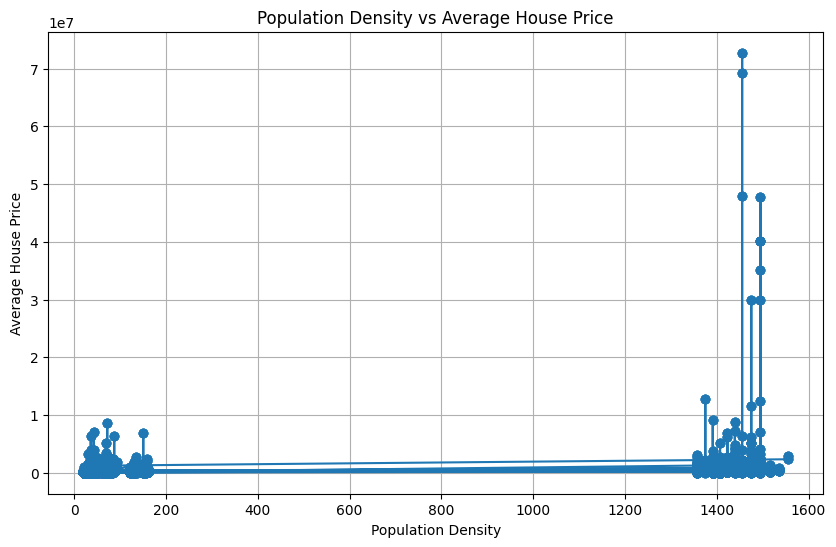

In [2605]:
##House sales by county
#Bar chart of properties per year
plt.figure(figsize=(10, 6))
plt.plot(nxt_combine['Population Density'], nxt_combine['Price'], marker='o', linestyle='-')
plt.title('Population Density vs Average House Price')
plt.xlabel('Population Density')
plt.ylabel('Average House Price')
plt.grid(True)
plt.show()

### Chart Pop Density vs Average House Price

<Axes: xlabel='Population Density'>

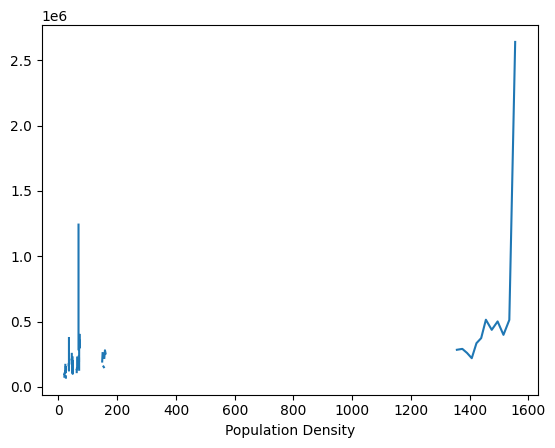

In [2606]:
nxt_combine.groupby('Population Density')['Price'].mean().plot(x='Population Density', y='Average House Price', kind='line')

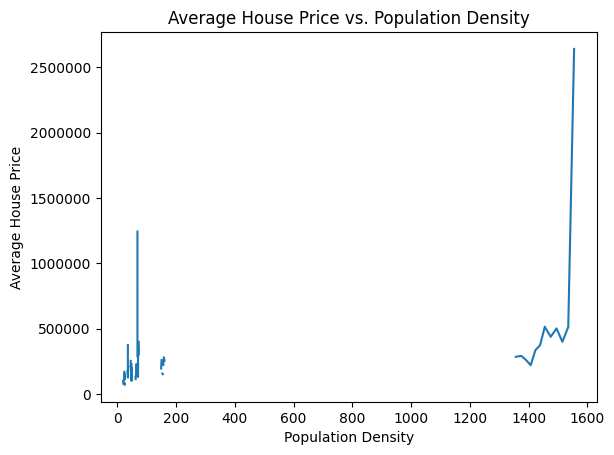

In [2607]:
nxt_combine.groupby('Population Density')['Price'].mean().plot(x='Population Density', y='Average House Price', kind='line')

# Set y-axis labels to integer
#https://www.geeksforgeeks.org/formatting-axes-in-python-matplotlib/
plt.gca().get_yaxis().set_major_formatter(FormatStrFormatter('%.0f'))

# Add labels and title
plt.xlabel('Population Density')
plt.ylabel('Average House Price')
plt.title('Average House Price vs. Population Density')

# Show the plot
plt.show()

In [2608]:
nxt_combine["Population Density"].max()

1575.09

In [2609]:
nxt_combine["Population Density"][(nxt_combine["County"] != "DUBLIN")].max()

169.11

### Add a column for normalised population density

In [2610]:
nxt_combine['Pop Density - Normal'] = nxt_combine['Population Density']  / nxt_combine['Population Density'].abs().max()

### Add a column for Prices deducted by inflation

In [2611]:
nxt_combine['Price-No Inflation'] = nxt_combine['Price'] * nxt_combine['Inflation']

In [2612]:
nxt_combine['Price-No Inflation']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
209846   NaN
209847   NaN
209848   NaN
209849   NaN
209850   NaN
Name: Price-No Inflation, Length: 209851, dtype: float64

### Add a column to normalise prices by house size

In [2613]:
nxt_combine['Property Size Description'].unique()
#['greater than or equal to 38 sq metres and less than 125 sq metres','greater than 125 sq metres', 'less than 38 sq metres','greater than or equal to 125 sq metres'],

array([nan, 'greater than 125 sq metres',
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'less than 38 sq metres', 'greater than or equal to 125 sq metres'],
      dtype=object)

In [2614]:
nxt_combine[nxt_combine['Property Size Description']== 'less than 38 sq metres']['Price'].mean()/38

5648.070628688667

In [2615]:
nxt_combine[nxt_combine['Property Size Description']== 'greater than or equal to 38 sq metres and less than 125 sq metres']['Price'].mean()/80

3277.1437568423744

In [2616]:
nxt_combine[nxt_combine['Property Size Description']== 'greater than or equal to 125 sq metres']['Price'].mean()/125

3989.30258654222

In [2617]:
nxt_combine[nxt_combine['Property Size Description']== 'greater than 125 sq metres']['Price'].mean()/125

2536.826534075115

In [2618]:
nxt_combine['Price by House Size'] = py.select(
    [
        nxt_combine['Property Size Description'] == 'greater than or equal to 38 sq metres and less than 125 sq metres',
        nxt_combine['Property Size Description'] == 'greater than 125 sq metres',
        nxt_combine['Property Size Description'] == 'less than 38 sq metres',
        nxt_combine['Property Size Description'] == 'greater than or equal to 125 sq metres'
    ],
    [
        nxt_combine['Price'] / 80,
        nxt_combine['Price'] / 125,
        nxt_combine['Price'] / 38,
        nxt_combine['Price'] / 125
    ],
    default=py.nan
)

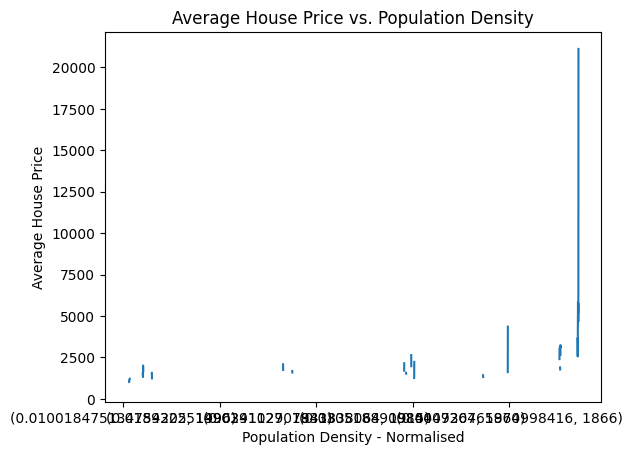

In [2620]:
nxt_combine.groupby(['Pop Density - Normal','Year'])['Price by House Size'].mean().plot(x='Population Density - Normalised', y='Average House Price', kind='line')

# Set y-axis labels to integer
#https://www.geeksforgeeks.org/formatting-axes-in-python-matplotlib/
plt.gca().get_yaxis().set_major_formatter(FormatStrFormatter('%.0f'))

# Add labels and title
plt.xlabel('Population Density - Normalised')
plt.ylabel('Average House Price')
plt.title('Average House Price vs. Population Density')

# Show the plot
plt.show()

## Finally Output dataset again

In [2621]:
## Finally Output dataset again
#Output changes to csv
nxt_combine.to_csv(fp3)